In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc
from lmfit.models import PolynomialModel

In [3]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_dincident from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
print(df)

     inc_dincident
0       2016-03-31
1       2016-03-31
2       2016-04-01
3       2016-03-25
4       2016-04-02
5       2016-04-01
6       2016-04-01
7       2016-04-02
8       2016-04-02
9       2016-04-03
10      2016-04-03
11      2016-04-02
12      2016-04-02
13      2016-04-02
14      2016-04-02
15      2016-04-02
16      2016-04-04
17      2016-04-02
18      2016-04-04
19      2016-04-02
20      2016-03-23
21      2016-04-02
22      2016-04-02
23      2016-04-04
24      2016-04-04
25      2016-04-05
26      2016-03-30
27      2016-04-06
28      2016-04-06
29      2016-04-06
...            ...
9030    2019-10-07
9031    2019-10-07
9032    2019-10-07
9033    2019-10-07
9034    2019-10-07
9035    2019-10-07
9036    2019-10-04
9037    2019-10-07
9038    2019-10-08
9039    2019-10-08
9040    2019-09-23
9041    2019-10-08
9042    2019-10-08
9043    2019-10-07
9044    2019-10-09
9045    2019-10-07
9046    2019-10-08
9047    2019-10-10
9048    2019-10-10
9049    2019-10-10
9050    2019

In [4]:
df = df[df.inc_dincident > '2016-03-31']
df = df[df.inc_dincident < '2019-10-01']
print(df)

     inc_dincident
2       2016-04-01
4       2016-04-02
5       2016-04-01
6       2016-04-01
7       2016-04-02
8       2016-04-02
9       2016-04-03
10      2016-04-03
11      2016-04-02
12      2016-04-02
13      2016-04-02
14      2016-04-02
15      2016-04-02
16      2016-04-04
17      2016-04-02
18      2016-04-04
19      2016-04-02
21      2016-04-02
22      2016-04-02
23      2016-04-04
24      2016-04-04
25      2016-04-05
27      2016-04-06
28      2016-04-06
29      2016-04-06
30      2016-04-06
31      2016-04-06
32      2016-04-06
33      2016-04-07
34      2016-04-05
...            ...
8950    2019-09-26
8951    2019-09-26
8952    2019-09-27
8953    2019-09-27
8954    2019-09-27
8955    2019-09-27
8956    2019-09-28
8957    2019-09-26
8958    2019-09-28
8959    2019-09-28
8960    2019-09-28
8961    2019-09-21
8962    2019-09-21
8963    2019-09-29
8964    2019-09-21
8965    2019-09-29
8966    2019-09-27
8967    2019-09-28
8968    2019-09-23
8969    2019-09-30
8970    2019

In [6]:
df['month'] = df['inc_dincident'].dt.month
print(df)

     inc_dincident  month
2       2016-04-01      4
4       2016-04-02      4
5       2016-04-01      4
6       2016-04-01      4
7       2016-04-02      4
8       2016-04-02      4
9       2016-04-03      4
10      2016-04-03      4
11      2016-04-02      4
12      2016-04-02      4
13      2016-04-02      4
14      2016-04-02      4
15      2016-04-02      4
16      2016-04-04      4
17      2016-04-02      4
18      2016-04-04      4
19      2016-04-02      4
21      2016-04-02      4
22      2016-04-02      4
23      2016-04-04      4
24      2016-04-04      4
25      2016-04-05      4
27      2016-04-06      4
28      2016-04-06      4
29      2016-04-06      4
30      2016-04-06      4
31      2016-04-06      4
32      2016-04-06      4
33      2016-04-07      4
34      2016-04-05      4
...            ...    ...
8950    2019-09-26      9
8951    2019-09-26      9
8952    2019-09-27      9
8953    2019-09-27      9
8954    2019-09-27      9
8955    2019-09-27      9
8956    2019

In [7]:
month_occurences = np.array([3,3,3,4,4,4,4,4,4,3,3,3])
print(month_occurences)

[3 3 3 4 4 4 4 4 4 3 3 3]


In [11]:
days_in_month = np.ones(12)*31
days_in_month[1] = 28
days_in_month[3] = 30
days_in_month[5] = 30
days_in_month[8] = 30
days_in_month[10] = 30
print(days_in_month)

[31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]


In [12]:
division_factor = month_occurences*days_in_month
print(division_factor)

[ 93.  84.  93. 120. 124. 120. 124. 124. 120.  93.  90.  93.]


(0.0, 1.0, 0.0, 1.0)

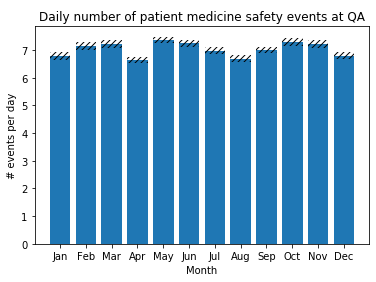

In [17]:
bins = [i+0.5 for i in range(13)]
data_x = [i+1 for i in range(12)]
data_y_tot,_ = np.histogram(df.month.values, bins=bins)
data_y = data_y_tot/division_factor
data_y_err = np.sqrt(data_y_tot)/division_factor
plt.bar(data_x,data_y,label='Data')
plt.bar(data_x,data_y_err,bottom=data_y-data_y_err/2,alpha=0.5,color='none',hatch="////",label='Uncertainty')
#plt.legend(frameon=False)
ax = plt.gca()
locs, labels = plt.xticks()
plt.xticks(data_x,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month');
plt.ylabel('# events per day')
plt.title('Daily number of patient medicine safety events at QA')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.65, 0.3, 0.3], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
#ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

In [20]:
# data fit
polynomial_mod = PolynomialModel(0)
pars = polynomial_mod.guess(data_y, x=data_x, c0=data_y[0])
model = polynomial_mod
out = model.fit(data_y, pars, x=data_x)

(-0.5, 3301.5, 495.5, -0.5)

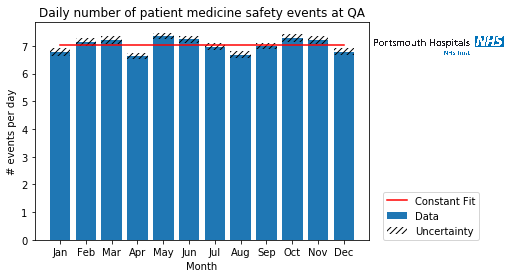

In [31]:
plt.bar(data_x,data_y,label='Data')
plt.bar(data_x,data_y_err,bottom=data_y-data_y_err/2,alpha=0.5,color='none',hatch="////",label='Uncertainty')
plt.plot(data_x, out.best_fit, '-r', label='Constant Fit')
plt.legend(loc=(1.04,0))
ax = plt.gca()
locs, labels = plt.xticks()
plt.xticks(data_x,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month');
plt.ylabel('# events per day')
plt.title('Daily number of patient medicine safety events at QA')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.91,0.65, 0.3, 0.3], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels